É possível prever o salário de alguem com base nas horas de estudos?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/DSA/Machine Learning/Cap 15/dataset.csv')

In [ ]:
dados.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


## Resumo estatístico

In [ ]:
dados.isnull().sum()

horas_estudo_mes    0
salario             0
dtype: int64

In [ ]:
# correlação
dados.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


In [ ]:
# dados estatisticos da variavel preditora
dados['horas_estudo_mes'].describe()

count    500.000000
mean      50.060000
std       14.659406
min        1.000000
25%       39.750000
50%       50.000000
75%       60.000000
max      100.000000
Name: horas_estudo_mes, dtype: float64

<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

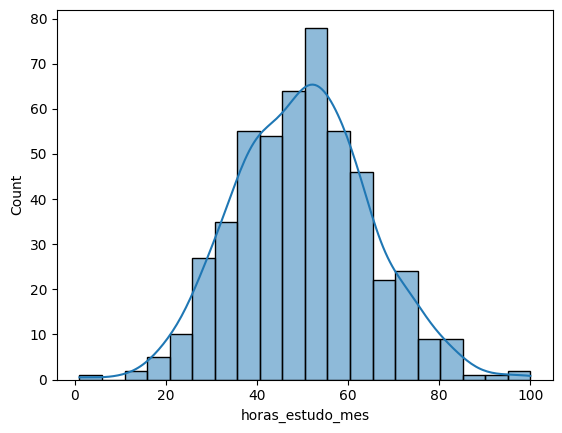

In [ ]:
# histograma
sns.histplot(data = dados, x = 'horas_estudo_mes', kde = True)

## Preparação dos dados

In [ ]:
# variavel de entrada
X = np.array(dados['horas_estudo_mes']) # transforma em matriz numpy, esperado pelo sclearn

In [ ]:
# ajusta o shape
X = X.reshape(-1,1)

In [ ]:
# variavel de saida
y = dados['salario']

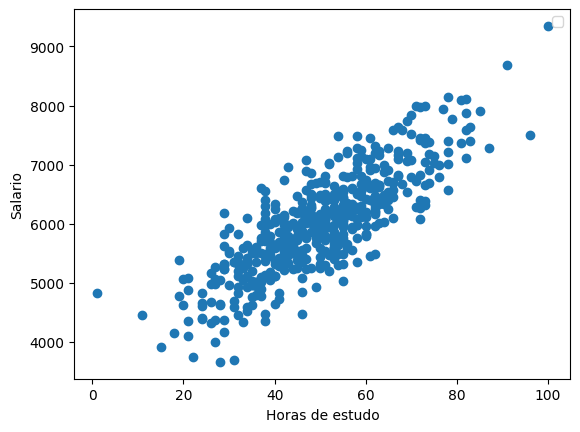

In [ ]:
plt.scatter(X, y)
plt.xlabel('Horas de estudo')
plt.ylabel('Salario')
plt.legend()
plt.show()

## Divisão treino e teste

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state=42) # 20% para teste

## Modelagem

In [ ]:
modelo = LinearRegression()

In [ ]:
# treina o modelo
modelo.fit(X_treino, y_treino)

LinearRegression()

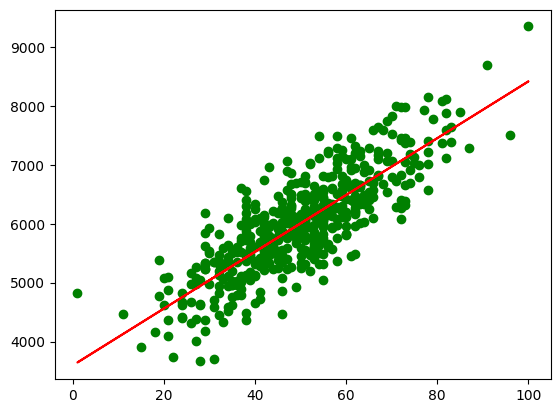

In [ ]:
plt.scatter(X, y, color = 'green', label = 'Dados fornecidos')
plt.plot(X, modelo.predict(X), color = 'red', label = 'Previsão do modelo')
plt.show()

In [ ]:
# avalia com os dados de teste
score = modelo.score(X_teste, y_teste)
print(f"coeficiente r^2: {score:.2f}")

coeficiente r^2: 0.59


In [ ]:
# w0
modelo.intercept_

3596.7837243727545

In [ ]:
# w1 (inclinação)
modelo.coef_

array([48.18185277])

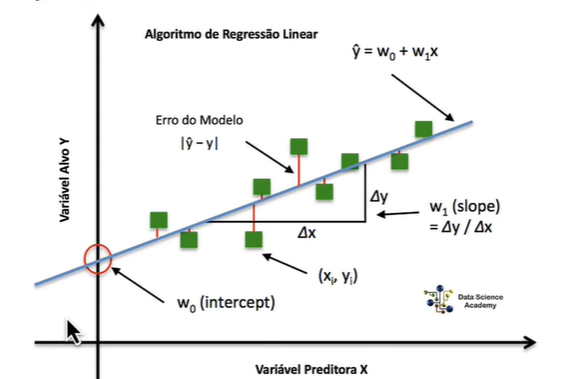

# Deploy do modelo

In [ ]:
# novo valor em horas de estudo
new_horas = np.array([[48]])

In [ ]:
# salario previsto
sal_prev = modelo.predict(new_horas) # predict aplica a equação obtida pelo modelo

In [ ]:
print("Com ", new_horas, " horas de estudo, seu salário será ", sal_prev)

Com  [[48]]  horas de estudo, seu salário será  [5909.5126574]


In [ ]:
# fazendo o calculo com os parametros do modelo
# y_novo = w0 + w1 * x
sal = modelo.intercept_ + (modelo.coef_ * new_horas)
print(sal)

[[5909.5126574]]
